In [ ]:
from dataset.lowlevel_PromtGIP_dataloader import DatasetLowlevel_Train
from dataset.data_utiles import load_config
config = load_config("./config/xrestormer.yaml")
dataset_train = DatasetLowlevel_Train(dataset_path='/mnt/petrelfs/zhaoxiangyu1/data/Test100_256', 
                                    input_size=256,
                                    phase = 'train',
                                    split='training',
                                    **config["dataset"])

In [ ]:
a, b = dataset_train.__getitem__(12899)
print(a[2].shape)

import torch
data_loader_train = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=6,
    num_workers=2,
    drop_last=True,
)


In [ ]:
data_loader_i = iter(data_loader_train)
(batch, _) = next(data_loader_i)
print(batch.type)
isinstance(batch, tuple)
not isinstance(batch, list)

In [2]:
from petrel_client.client import Client
import io
import numpy as np
client = Client(conf_path="~/petreloss.conf")

data_type=['vis']
frame_id = 48
data_all = []
for itme in data_type:
    path = f"s3://sevir_pair/{itme}/2018/R18032903207578.npy"
    data = io.BytesIO(client.get(path))
    data = np.load(data)
    data = data[:, :, frame_id]
    if itme == "vis":
        print(data)
    data_all.append(data)

[[  3   3   1 ...   0   9   4]
 [  0   4   5 ...   0   5   3]
 [ -6   6   8 ...   0   1   2]
 ...
 [ -5   0   6 ...   0   0   0]
 [-11   8   5 ...   1  -2  -4]
 [ -9   5   6 ...   1  -9  -2]]


In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(data_all[0], cmap='gray')
plt.title('VIS Data')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(data_all[1], cmap='inferno')
plt.title('ir069 Data')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.imshow(data_all[2], cmap='inferno')
plt.title('ir107 Data')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow(data_all[3], cmap='viridis')
plt.title('VIL Data')
plt.colorbar()

plt.tight_layout()
plt.show()

In [1]:
import dataset.lowlevel_PromtGIP_dataloader as lowlevel_prompt_dataloader
from dataset.rainnet_dataloader import RainNetDataset

In [2]:
dataset_train = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='sevir',input_size=256,phase = 'train',task='sevir')
dataset_train2 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='ir_trans',input_size=256,phase = 'train',task='trans')
dataset_train3 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='inter',input_size=256,phase = 'train',task='inter')
dataset_train4 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='down_scaling_vil',input_size=256,phase = 'train',task='down_scaling')
dataset_train5 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='vis_recon',input_size=256,
                                                                   phase='train',task='down_scaling')
dataset_train_4c = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='predict',input_size=256,
                                                                   phase = 'train',task='predict')
dataset_dblur = lowlevel_prompt_dataloader.Dataset_dblur(split='train')
dataset = dataset_train+dataset_train2+dataset_train3

SEVIR train number: 10500


In [3]:
import numpy as np
from dataset.image_operators import *
dataset = RainNetDataset('train', frame=4, is_crop=True)
a,b=dataset.__getitem__(0)
a[0].shape
# in_data = np.expand_dims(cv2.resize(np.copy(a[0]), (256, 256),
#                                 interpolation=cv2.INTER_LINEAR), axis=2)
# out_data = cv2.resize(np.copy(a[1]), (256, 256),
#                                 interpolation=cv2.INTER_LINEAR)
# in_data.shape

torch.Size([2, 256, 256])

In [11]:
dataset_train5.__getitem__(0)[0][3].shape

torch.Size([2, 256, 256])

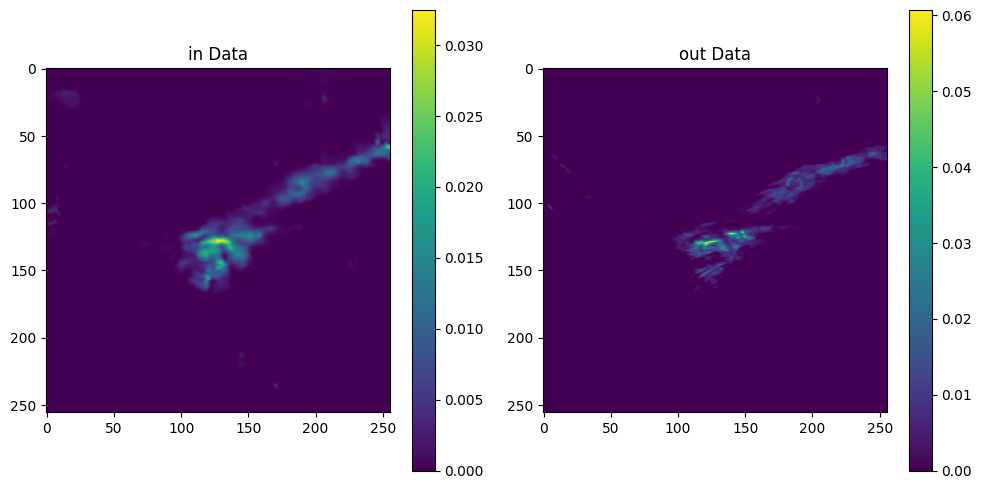

In [6]:
dataitem,b=dataset.__getitem__(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(a[0][0], cmap='viridis')
plt.title('in Data')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(a[1][0], cmap='viridis')
plt.title('out Data')
plt.colorbar()

plt.tight_layout()
plt.show()


In [3]:
import torch
import itertools
data_loader_train_4c = torch.utils.data.DataLoader(
    dataset,
    batch_size=64,
    num_workers=4,
    drop_last=True,
)
cycle_iter_appendix = itertools.cycle(data_loader_train_4c)

In [15]:
dataset_train.__getitem__(0)

([tensor([[[ 1.3336,  1.3224,  1.3043,  ...,  1.1713,  1.1768,  1.1821],
           [ 1.3533,  1.3408,  1.3168,  ...,  1.1682,  1.1736,  1.1800],
           [ 1.3798,  1.3629,  1.3325,  ...,  1.1669,  1.1710,  1.1761],
           ...,
           [ 0.6929,  0.6891,  0.6851,  ..., -0.5914, -0.5815, -0.5859],
           [ 0.6974,  0.6956,  0.6918,  ..., -0.5727, -0.5800, -0.6013],
           [ 0.7011,  0.7016,  0.6984,  ..., -0.5488, -0.5763, -0.6124]],
  
          [[ 0.2239,  0.2359,  0.2521,  ...,  0.7425,  0.7443,  0.7445],
           [ 0.2449,  0.2501,  0.2572,  ...,  0.7398,  0.7415,  0.7423],
           [ 0.2799,  0.2806,  0.2798,  ...,  0.7365,  0.7381,  0.7396],
           ...,
           [ 0.0161,  0.0122,  0.0081,  ..., -0.9733, -0.9683, -0.9723],
           [ 0.0180,  0.0138,  0.0090,  ..., -0.9598, -0.9657, -0.9793],
           [ 0.0202,  0.0170,  0.0128,  ..., -0.9437, -0.9620, -0.9839]]]),
  tensor([[[-0.6613, -0.6613, -0.6613,  ..., -0.6403, -0.6521, -0.6995],
           [

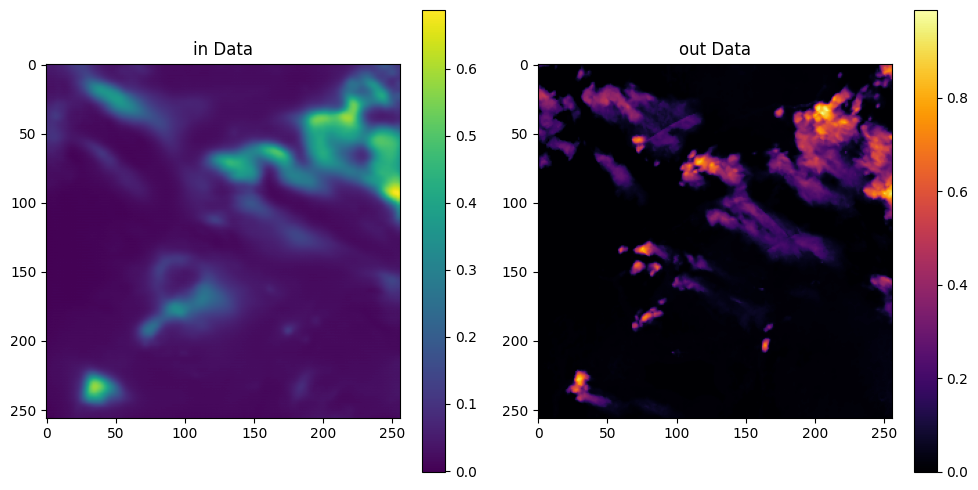

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dataset_dblur.__getitem__(0)['inputs'][0], cmap='viridis')
plt.title('in Data')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(dataset_dblur.__getitem__(0)['data_samples'][0], cmap='inferno')
plt.title('out Data')
plt.colorbar()

plt.tight_layout()
plt.show()


In [5]:
data_loader_i = iter(data_loader2)

In [6]:
print(data_loader_i)
batch,type_d = next(data_loader_i)
type_d

('predict',
 'predict',
 'predict',
 'predict',
 'predict',
 'predict',
 'predict',
 'predict')

In [15]:
batch[0].shape

torch.Size([8, 4, 256, 256])